# Module 7: Sentiment and Emotion Analysis Lab
## ITAI 2373 - Natural Language Processing

### Lab Overview
Welcome to the Sentiment and Emotion Analysis lab! In this hands-on session, you'll build a complete emotion detection system that works with both text and speech. This lab connects directly to Module 7's concepts and gives you practical experience with real-world emotion analysis.


### What You'll Build Today:
1. **Text Sentiment Analyzer** using VADER and TextBlob
2. **Machine Learning Classifier** with scikit-learn
3. **Speech Emotion Detector** using audio features
4. **Multimodal System** combining text and speech analysis

### Real Data You'll Use:
- Customer reviews from multiple domains
- Social media posts with emotion labels
- Audio recordings with emotional speech
- Multimodal datasets combining text and audio

### Learning Objectives:
By the end of this lab, you will:
- Understand the differences between rule-based and ML approaches to sentiment analysis
- Build and evaluate multiple sentiment analysis systems
- Extract and analyze emotional features from speech
- Create a multimodal emotion detection system
- Critically evaluate bias and fairness in emotion detection systems

## Before we start let's see how this lab ties to previous modules ##

---
### 🔗 Building on Previous Modules

Welcome to Module 7! This lab builds directly on everything you've learned so far:

**From Module 1 (Introduction to NLP):**
- We'll apply NLP to understand human emotions and opinions
- Real-world applications: customer feedback, social media monitoring, healthcare

**From Module 2 (Text Preprocessing):**
- We'll use tokenization, normalization, and cleaning techniques
- Preprocessing becomes crucial for emotion detection accuracy

**From Module 3 (Audio and Preprocessing):**
- We'll extract emotional features from speech signals
- Combine text and audio for multimodal emotion analysis

**From Module 4 (Text Representation):**
- We'll use TF-IDF vectorization for machine learning approaches
- Compare rule-based vs. ML feature representations

**From Module 5 (Part-of-Speech Tagging):**
- POS tags help identify emotional intensity (adjectives, adverbs)
- Grammatical patterns reveal sentiment structure

**From Module 6 (Syntax and Parsing):**
- Dependency relationships show emotional targets ("I love THIS product")
- Syntactic patterns help resolve sentiment scope and negation

### 🚀Now,  Let's Get Started!
Run each cell in order and complete the exercises marked with **✏️ YOUR TURN**

## Part 0: Setup and Installation

First, let's install all the libraries we'll need for this comprehensive lab. We'll be working with text processing, machine learning, and audio analysis libraries.

In [3]:
# Install required libraries for Google Colab
!pip install vaderSentiment textblob librosa soundfile
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import librosa
import soundfile as sf
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries installed and imported successfully!")
print("📚 Ready to start building emotion detection systems!")

✅ All libraries installed and imported successfully!
📚 Ready to start building emotion detection systems!


## 🔗 Let's Review in Practice How Previous Modules Tie in to Today:



In [5]:
# Example text that demonstrates concepts from all previous modules
example_text = "I absolutely LOVE this amazing product! It works perfectly and exceeded my expectations."

print("🔍 Analyzing with Previous Module Concepts:")
print(f"Original text: {example_text}")
print()

# Module 2: Text Preprocessing
import re
import string

def basic_preprocess(text):
    # Tokenization (Module 2)
    tokens = text.split()
    # Normalization (Module 2)
    tokens = [token.lower().strip(string.punctuation) for token in tokens]
    return tokens

tokens = basic_preprocess(example_text)
print(f"📝 Module 2 (Preprocessing) - Tokens: {tokens}")

# Module 4: Text Representation (TF-IDF preview)
sample_docs = [
    "I love this product",
    "This product is amazing",
    "I hate this terrible product"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sample_docs)
feature_names = vectorizer.get_feature_names_out()

print(f"\n🔢 Module 4 (Text Representation) - TF-IDF Features: {list(feature_names)}")

# Module 5: POS Tagging for sentiment
from textblob import TextBlob
blob = TextBlob(example_text)
pos_tags = blob.tags

print(f"\n🏷️ Module 5 (POS Tagging) - Tags: {pos_tags}")
print("   Notice: Adjectives (JJ) often carry emotional weight: 'amazing', 'perfect'")

# Module 6: Syntax for sentiment scope
print(f"\n🕵️ Module 6 (Syntax/Parsing) - Dependency relationships help us understand:")
print("   - What is being loved? (the product)")
print("   - What makes it amazing? (it works perfectly)")
print("   - Scope of sentiment: entire product experience")

print("\n💡 Key Insight: Sentiment analysis combines ALL previous concepts!")
print("   - Preprocessing cleans the text")
print("   - POS tags identify emotional words")
print("   - Syntax shows what the emotions target")
print("   - Text representation enables ML approaches")

🔍 Analyzing with Previous Module Concepts:
Original text: I absolutely LOVE this amazing product! It works perfectly and exceeded my expectations.

📝 Module 2 (Preprocessing) - Tokens: ['i', 'absolutely', 'love', 'this', 'amazing', 'product', 'it', 'works', 'perfectly', 'and', 'exceeded', 'my', 'expectations']

🔢 Module 4 (Text Representation) - TF-IDF Features: ['amazing', 'hate', 'is', 'love', 'product', 'terrible', 'this']

🏷️ Module 5 (POS Tagging) - Tags: [('I', 'PRP'), ('absolutely', 'RB'), ('LOVE', 'VBP'), ('this', 'DT'), ('amazing', 'JJ'), ('product', 'NN'), ('It', 'PRP'), ('works', 'VBZ'), ('perfectly', 'RB'), ('and', 'CC'), ('exceeded', 'VBD'), ('my', 'PRP$'), ('expectations', 'NNS')]
   Notice: Adjectives (JJ) often carry emotional weight: 'amazing', 'perfect'

🕵️ Module 6 (Syntax/Parsing) - Dependency relationships help us understand:
   - What is being loved? (the product)
   - What makes it amazing? (it works perfectly)
   - Scope of sentiment: entire product experience



### 📚 **Let's Recap some of the foundation from EDA & Machine Learning DataFrames Quick Review**

#### **What is a DataFrame?**

Think of a **DataFrame** as a digital spreadsheet or table, just like Excel. It has:
- **Rows** (horizontal) - each row represents one piece of data
- **Columns** (vertical) - each column represents a different attribute or feature  
- **Cells** - where specific data values are stored

In Python, we use **pandas** (imported as `pd`) to create and work with DataFrames.

---

#### **Step-by-Step Breakdown of Our Sample Data Creation:**

##### **Step 1: Creating the Text Data**
```python
sample_texts = [
    "I absolutely love this product! It's amazing and works perfectly.",
    "This is the worst purchase I've ever made. Completely disappointed.",
    # ... more examples
]
```

**What's happening here:**
- We create a **list** (think of it as a container) of text examples
- Each text represents what a real customer might write in a review or social media post
- The square brackets `[]` define a list in Python
- Each text is in quotes because it's a **string** (text data type)

**Why these specific texts:**
- **Positive examples**: "I absolutely love this product!" (clearly happy/positive)
- **Negative examples**: "This is the worst purchase!" (clearly angry/negative)  
- **Neutral examples**: "The product is okay" (neither positive nor negative)
- **Social media style**: "OMG this is INCREDIBLE!!! 😍" (with emojis and excitement)

##### **Step 2: Creating the DataFrame Structure**
```python
df_sample = pd.DataFrame({
    'text': sample_texts,
    'source': ['review', 'review', 'social_media', ...]
})
```

**What's happening here:**
- `pd.DataFrame({...})` creates a new table/spreadsheet
- The curly braces `{}` define a **dictionary** - a way to pair names with values
- `'text': sample_texts` creates a column called "text" and fills it with our text examples
- `'source': [...]` creates a column called "source" and labels each text as either "review" or "social_media"

**The resulting table looks like this:**

| Index | text | source |
|-------|------|--------|
| 0 | "I absolutely love this product!..." | review |
| 1 | "This is the worst purchase..." | review |
| 2 | "The product is okay..." | review |
| 3 | "OMG this is INCREDIBLE!!!" | social_media |
| 4 | "Meh... it's fine I guess..." | review |

---

#### **🎯 Key Concepts Revisited:**

1. **Lists** `[]`: Store multiple items in order
2. **Dictionaries** `{}`: Pair names with values (like "name": "John")
3. **DataFrames**: Tables for organizing data with rows and columns
4. **Columns**: Vertical data categories (like "text" and "source")
5. **Rows**: Horizontal data entries (each customer comment)

---

#### **🔍 Why Create This Sample Data?**

##### **1. Controlled Testing Environment**
- We know exactly what emotions each text should express
- We can test if our emotion detection systems work correctly
- Like having an answer key to check our work

##### **2. Diverse Text Types**
- **Product reviews**: Professional, detailed feedback
- **Social media posts**: Casual, with emojis and slang
- This tests how well our systems handle different writing styles

##### **3. Balanced Emotions**
- Mix of positive, negative, and neutral sentiments
- Ensures our system can detect all types of emotions
- Prevents bias toward one emotion type

##### **4. Real-World Simulation**
- These texts represent what you'd actually find online
- Helps us understand how emotion detection works in practice
- Prepares us for analyzing real customer feedback

---

#### **🚀 Why This Matters for Emotion Analysis:**

This sample data serves as our **training ground** where we can:
- Test different emotion detection methods
- Compare their accuracy
- Understand their strengths and weaknesses
- Learn how to handle different types of text

Think of it like practicing basketball shots on a practice court before playing in a real game - we need controlled examples before analyzing real customer feedback!

---

#### **📊 Understanding the Output Code:**

```python
print(f"Total texts: {len(df_sample)}")
print(f"Sources: {df_sample['source'].value_counts().to_dict()}")
```

**What each line does:**
- `len(df_sample)` counts how many rows (text examples) we have
- `df_sample['source'].value_counts()` counts how many of each source type we have
- `.to_dict()` converts the count into a dictionary format for easy reading

This gives us a quick summary of our data structure and helps us verify everything was created correctly

In [7]:
# Create sample data that demonstrates different linguistic phenomena
sample_texts = [
    "I absolutely love this product! It's amazing and works perfectly.",  # Positive with intensifiers
    "This is the worst purchase I've ever made. Completely disappointed.",  # Negative with superlatives
    "The product is okay, nothing special but does the job.",  # Neutral with mixed signals
    "OMG this is INCREDIBLE!!! 😍 Best thing ever!!!",  # Social media style
    "I don't hate this product, but it's not great either.",  # Negation (Module 6 syntax!)
    "The customer service was not bad, actually quite helpful.",  # Double negation
    "This expensive product should work better for the price.",  # Implicit criticism
    "Fast shipping, good quality, would recommend to others.",  # Multiple aspects
    "It's fine I guess... could be worse 😐",  # Lukewarm sentiment
    "TERRIBLE quality!!! Waste of money 😡 Never buying again!",  # Strong negative
]

# Create DataFrame
df_sample = pd.DataFrame({
    'text': sample_texts,
    'linguistic_feature': [
        'intensifiers', 'superlatives', 'mixed_signals', 'social_media',
        'negation', 'double_negation', 'implicit', 'multi_aspect',
        'lukewarm', 'strong_negative'
    ]
})

print("📝 Sample Data with Linguistic Challenges:")
for i, row in df_sample.iterrows():
    print(f"{i+1}. [{row['linguistic_feature']}] {row['text']}")

print("📝 Sample Data Created:")
print(f"Total texts: {len(df_sample)}")
# Removed the 'source' column value_counts as it's not present in the df_sample creation
# print(f"Sources: {df_sample['source'].value_counts().to_dict()}")
print("\n🔍 First few examples:")
for i, row in df_sample.head(3).iterrows():
    # Removed the 'source' column reference as it's not present in the df_sample creation
    # print(f"{i+1}. [{row['source']}] {row['text']}")
    print(f"{i+1}. [{row['linguistic_feature']}] {row['text']}")

📝 Sample Data with Linguistic Challenges:
1. [intensifiers] I absolutely love this product! It's amazing and works perfectly.
2. [superlatives] This is the worst purchase I've ever made. Completely disappointed.
3. [mixed_signals] The product is okay, nothing special but does the job.
4. [social_media] OMG this is INCREDIBLE!!! 😍 Best thing ever!!!
5. [negation] I don't hate this product, but it's not great either.
6. [double_negation] The customer service was not bad, actually quite helpful.
7. [implicit] This expensive product should work better for the price.
8. [multi_aspect] Fast shipping, good quality, would recommend to others.
9. [lukewarm] It's fine I guess... could be worse 😐
10. [strong_negative] TERRIBLE quality!!! Waste of money 😡 Never buying again!
📝 Sample Data Created:
Total texts: 10

🔍 First few examples:
1. [intensifiers] I absolutely love this product! It's amazing and works perfectly.
2. [superlatives] This is the worst purchase I've ever made. Completely disappoi

## Part 1: Text Sentiment Analysis with VADER and TextBlob

### Understanding Rule-Based Sentiment Analysis

Rule-based sentiment analysis uses **lexicons** (dictionaries) that map words to sentiment scores. This connects directly to Module 4's discussion of text representation - instead of TF-IDF vectors, we use pre-built emotional dictionaries.

**VADER (Valence Aware Dictionary and sEntiment Reasoner):**
- Designed for social media text
- Handles emojis, capitalization, punctuation
- Uses linguistic rules (like Module 6's parsing rules)

**TextBlob:**
- General-purpose sentiment analysis
- Provides both polarity and subjectivity scores
- Based on movie review corpus

### 1.1 VADER Sentiment Analysis

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is specifically designed for social media text. It:
- Handles emojis, slang, and intensifiers
- Provides compound scores from -1 (most negative) to +1 (most positive)
- Gives detailed breakdowns (positive, negative, neutral)

Let's see how VADER analyzes our sample texts:

In [8]:
# Initialize VADER analyzer
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_with_vader(text):
    """Analyze sentiment using VADER"""
    scores = vader_analyzer.polarity_scores(text)
    return scores

def classify_vader_sentiment(compound_score):
    """Convert VADER compound score to sentiment label"""
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze all sample texts with VADER
vader_results = []
for text in df_sample['text']:
    scores = analyze_with_vader(text)
    vader_results.append({
        'compound': scores['compound'],
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu'],
        'sentiment': classify_vader_sentiment(scores['compound'])
    })

# Add VADER results to DataFrame
vader_df = pd.DataFrame(vader_results)
df_sample = pd.concat([df_sample, vader_df.add_prefix('vader_')], axis=1)

print("🎯 VADER Analysis Results:")
print("\n📊 Sentiment Distribution:")
print(df_sample['vader_sentiment'].value_counts())

print("\n🔍 Detailed Results:")
for i, row in df_sample.iterrows():
    print(f"{i+1}. {row['vader_sentiment']} (score: {row['vader_compound']:.3f})")
    print(f"   Text: {row['text'][:60]}...")
    print()

🎯 VADER Analysis Results:

📊 Sentiment Distribution:
vader_sentiment
Positive    5
Negative    4
Neutral     1
Name: count, dtype: int64

🔍 Detailed Results:
1. Positive (score: 0.930)
   Text: I absolutely love this product! It's amazing and works perfe...

2. Negative (score: -0.817)
   Text: This is the worst purchase I've ever made. Completely disapp...

3. Neutral (score: -0.046)
   Text: The product is okay, nothing special but does the job....

4. Positive (score: 0.886)
   Text: OMG this is INCREDIBLE!!! 😍 Best thing ever!!!...

5. Negative (score: -0.533)
   Text: I don't hate this product, but it's not great either....

6. Positive (score: 0.713)
   Text: The customer service was not bad, actually quite helpful....

7. Positive (score: 0.440)
   Text: This expensive product should work better for the price....

8. Positive (score: 0.660)
   Text: Fast shipping, good quality, would recommend to others....

9. Negative (score: -0.318)
   Text: It's fine I guess... could be wors

### 1.2 TextBlob Sentiment Analysis

**TextBlob** provides a different approach to sentiment analysis:
- Uses a different lexicon and algorithm than VADER
- Provides polarity (-1 to +1) and subjectivity (0 to 1) scores
- Generally more conservative in its sentiment assignments

Let's compare TextBlob results with VADER:

In [10]:
# TextBlob Analysis
def analyze_with_textblob(text):
    """Analyze sentiment using TextBlob"""
    blob = TextBlob(text)
    return {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }

def classify_textblob_sentiment(polarity):
    """Convert TextBlob polarity to sentiment label"""
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze with TextBlob
textblob_results = []
for text in df_sample['text']:
    scores = analyze_with_textblob(text)
    textblob_results.append({
        'polarity': scores['polarity'],
        'subjectivity': scores['subjectivity'],
        'sentiment': classify_textblob_sentiment(scores['polarity'])
    })

# Add TextBlob results
textblob_df = pd.DataFrame(textblob_results)
df_sample = pd.concat([df_sample, textblob_df.add_prefix('textblob_')], axis=1)

print("🎯 VADER vs TextBlob Comparison:")
comparison = pd.crosstab(df_sample['vader_sentiment'], df_sample['textblob_sentiment'], margins=True)
print(comparison)

print("\n🔍 Detailed Comparison:")
for i, row in df_sample.iterrows():
    if row['vader_sentiment'] != row['textblob_sentiment']:
        print(f"DISAGREEMENT on [{row['linguistic_feature']}]:")
        print(f"  Text: {row['text']}")
        print(f"  VADER: {row['vader_sentiment']} ({row['vader_compound']:.3f})")
        print(f"  TextBlob: {row['textblob_sentiment']} ({row['textblob_polarity']:.3f})")
        print()

print("🎯 TextBlob Analysis Results:")
print("\n📊 Sentiment Distribution:")
print(df_sample['textblob_sentiment'].value_counts())

print("\n🔍 Comparison with VADER:")
comparison = pd.crosstab(df_sample['vader_sentiment'], df_sample['textblob_sentiment'], margins=True)
print(comparison)

🎯 VADER vs TextBlob Comparison:
textblob_sentiment  Negative  Neutral  Positive  All
vader_sentiment                                     
Negative                   3        1         0    4
Neutral                    0        0         1    1
Positive                   0        1         4    5
All                        3        2         5   10

🔍 Detailed Comparison:
DISAGREEMENT on [mixed_signals]:
  Text: The product is okay, nothing special but does the job.
  VADER: Neutral (-0.046)
  TextBlob: Positive (0.429)

DISAGREEMENT on [implicit]:
  Text: This expensive product should work better for the price.
  VADER: Positive (0.440)
  TextBlob: Neutral (0.000)

DISAGREEMENT on [lukewarm]:
  Text: It's fine I guess... could be worse 😐
  VADER: Negative (-0.318)
  TextBlob: Neutral (0.008)

🎯 TextBlob Analysis Results:

📊 Sentiment Distribution:
textblob_sentiment
Positive    5
Negative    3
Neutral     2
Name: count, dtype: int64

🔍 Comparison with VADER:
textblob_sentiment  Negativ

### ✏️ YOUR TURN - Exercise 1: Analyzing Different Text Types

Now it's your turn to experiment with VADER and TextBlob! Complete the following tasks:

In [11]:
# ✏️ YOUR TURN: Create examples from YOUR experience

# 1. Think of 5 real examples from YOUR life where sentiment might be ambiguous
# These should be based on:
# - Something you actually said or wrote
# - A review you read that confused you
# - Social media posts from your friends/family
# - Text messages where tone was misunderstood
# - Cultural expressions from your background

your_real_examples = [
    "I guess that went better than expected... maybe.",
    "The product worked, but I wouldn't buy it again.",
    "Can’t believe she posted that. Wow.",
    "Nice. Just what I needed today. 🙄",
    "It’s raining again. Well, the sky must be crying like we do during finals."
]


# 2. Analyze YOUR examples
print("🧪 Analysis of YOUR Real-World Examples:")
print("=" * 50)

for i, text in enumerate(your_real_examples, 1):
    # TODO: Analyze each with VADER and TextBlob
    vader_scores = analyze_with_vader(text)
    textblob_scores = analyze_with_textblob(text)

    print(f"\n{i}. Your Example: {text}")
    print(f"   VADER: {classify_vader_sentiment(vader_scores['compound'])} ({vader_scores['compound']:.3f})")
    print(f"   TextBlob: {classify_textblob_sentiment(textblob_scores['polarity'])} ({textblob_scores['polarity']:.3f})")

# 3. Reflection Questions (AI cannot answer these for you!)
print("\n🤔 Personal Reflection Questions:")
print("Answer these based on YOUR experience running the code above:")
print()
print("1. Which of YOUR examples did the algorithms get wrong? Why do you think that happened?")
print("   Your answer: ")
print()
print("2. Did any results surprise you? Which ones and why?")
print("   Your answer: ")
print()
print("3. How did your cultural background or personal communication style affect the results?")
print("   Your answer: ")
print()
print("4. If you were to improve these algorithms, what would you focus on based on YOUR examples?")
print("   Your answer: ")

🧪 Analysis of YOUR Real-World Examples:

1. Your Example: I guess that went better than expected... maybe.
   VADER: Positive (0.440)
   TextBlob: Positive (0.200)

2. Your Example: The product worked, but I wouldn't buy it again.
   VADER: Neutral (0.000)
   TextBlob: Neutral (0.000)

3. Your Example: Can’t believe she posted that. Wow.
   VADER: Positive (0.586)
   TextBlob: Neutral (0.100)

4. Your Example: Nice. Just what I needed today. 🙄
   VADER: Positive (0.421)
   TextBlob: Positive (0.600)

5. Your Example: It’s raining again. Well, the sky must be crying like we do during finals.
   VADER: Positive (0.128)
   TextBlob: Negative (-0.200)

🤔 Personal Reflection Questions:
Answer these based on YOUR experience running the code above:

1. Which of YOUR examples did the algorithms get wrong? Why do you think that happened?
   Your answer: 

2. Did any results surprise you? Which ones and why?
   Your answer: 

3. How did your cultural background or personal communication style af

### 🧠 Conceptual Understanding Check

**Answer these questions to cement your learning:**



### Q1: How does sentiment analysis connect to Module 6 (Syntax/Parsing)?

**Your answer:**
Sentiment analysis connects to syntax and parsing because understanding sentence structure is essential for identifying which words affect sentiment and how. For example, in the sentence *"I didn’t like the movie, but the soundtrack was amazing,"* parsing helps identify that the sentiment applies negatively to *"movie"* and positively to *"soundtrack."* Syntax parsing (such as dependency parsing) can detect relationships between words, handle negations more effectively, and interpret complex sentence structures that impact overall sentiment.



### Q2: Why might POS tags from Module 5 be useful for sentiment analysis?

**Your answer:**
POS (Part-of-Speech) tags help identify words that usually carry sentiment, such as adjectives (*"terrible," "awesome"*) or adverbs (*"barely," "extremely"*). By tagging each word’s role in a sentence, sentiment analyzers can more accurately determine which words influence emotional tone. For instance, identifying that *"not"* is modifying an adjective can help detect negation in *"not good."* POS tagging also helps filter out less relevant words like conjunctions or determiners, improving precision.


### Q3: How does text preprocessing from Module 2 affect sentiment analysis accuracy?

**Your answer:**
Text preprocessing ensures that sentiment analysis is performed on clean, standardized data. Techniques such as lowercasing, removing punctuation, stemming/lemmatization, and handling negations (e.g., converting *"don’t"* to *"do not"*) all help reduce noise and maintain consistency across inputs. Poorly preprocessed data can confuse models or rule-based tools—for example, *"LOVED!!!"* vs. *"loved"* may be interpreted differently if not normalized. Preprocessing is especially important in sarcasm or emoji-heavy text, where tone can easily be misread.


### Q4: Compare rule-based sentiment analysis to the TF-IDF approach from Module 4. What are the key differences?

**Your answer:**
Rule-based sentiment analysis uses predefined lexicons or rules (like VADER or AFINN) to assign sentiment scores to words and phrases. It's interpretable, easy to use, and works well for short texts like tweets. However, it's limited by its vocabulary and often struggles with sarcasm or context.
On the other hand, TF-IDF is a statistical method that scores how important a word is in a document relative to a collection. While TF-IDF captures word relevance, it doesn't understand sentiment on its own—it must be combined with machine learning models trained on labeled data. In summary, rule-based is opinion-aware but context-limited; TF-IDF is context-aware but sentiment-neutral without supervision.




## Part 2: Machine Learning Approach to Sentiment Analysis

### Moving Beyond Rule-Based Methods

While rule-based methods like VADER and TextBlob are excellent for general-purpose sentiment analysis, a machine learning approach offers several key advantages. By training a model on a specific dataset, we can:
- **Learn domain-specific patterns** from your data
- **Handle context better** through feature learning
- **Adapt to specific use cases** like product reviews vs. social media
- **Potentially achieve higher accuracy** on your specific dataset

To use a machine learning algorithm for a task like sentiment classification, we must first convert our text data into a numerical format that the model can understand. This process is called feature engineering or text representation.

Let's build a machine learning classifier using scikit-learn and compare it with our rule-based methods.

### Loading Data for Machine Learning

In a real-world machine learning sentiment analysis project, you would typically load a much larger dataset with a minimum of thousands or even millions of tokens. This dataset would likely be loaded from a file (like a CSV or JSON) or an API. The larger the dataset, the better the model can learn complex patterns and generalize to new, unseen text.

**Note:** For the purpose of this exercise, we will be using a short, illustrative text dataset to demonstrate the process.

In [12]:
# Create ML dataset with examples that test different linguistic phenomena
ml_texts = [
    # Positive examples with different structures
    "This product exceeded my expectations! Highly recommend.",  # Simple positive
    "Amazing quality and fast shipping. Will buy again.",  # Multiple positive aspects
    "Love this! Works perfectly and looks great.",  # Enthusiastic
    "Not bad at all, actually quite good for the price.",  # Positive via negation
    "Better than I thought it would be, surprisingly good.",  # Exceeded expectations
    "Outstanding quality for the price. Very satisfied.",  # Value-based positive
    "This is exactly what I was looking for. Perfect!",  # Expectation match
    "Incredible value and fantastic performance.",  # Superlatives
    "Couldn't be happier with this purchase.",  # Negative construction, positive meaning
    "Superb quality and arrived quickly.",  # Multiple positive attributes

    # Negative examples with different structures
    "Terrible quality. Broke after one day.",  # Simple negative
    "Worst customer service ever. Very disappointed.",  # Superlative negative
    "Complete waste of money. Don't buy this.",  # Strong negative advice
    "Not what I expected, quite disappointing really.",  # Expectation mismatch
    "Arrived damaged and took forever to ship.",  # Multiple negative aspects
    "Doesn't work as advertised. Very frustrated.",  # Functional failure
    "Cheap plastic that feels like it will break.",  # Quality criticism
    "Overpriced for such poor quality.",  # Value-based negative
    "Regret buying this. Total disappointment.",  # Emotional regret
    "Horrible experience from start to finish.",  # Comprehensive negative

    # Neutral examples with different structures
    "The product is okay. Nothing special.",  # Simple neutral
    "Average quality for the price point.",  # Expectation match
    "It works but could be better.",  # Functional but limited
    "Decent product, meets basic requirements.",  # Adequate performance
    "Not bad, not great. Just average.",  # Explicit neutrality
    "Standard quality, as expected.",  # Expectation match
    "It's fine for what it is.",  # Conditional acceptance
    "Acceptable quality, nothing remarkable.",  # Adequate but unremarkable
    "Does the job but nothing more.",  # Functional adequacy
    "Mediocre product with basic features."  # Below average but functional
]

ml_labels = (
    ['positive'] * 10 +
    ['negative'] * 10 +
    ['neutral'] * 10
)

# Create DataFrame
df_ml = pd.DataFrame({
    'text': ml_texts,
    'sentiment': ml_labels
})

print("📊 Machine Learning Dataset:")
print(f"Total examples: {len(df_ml)}")
print(f"Label distribution: {df_ml['sentiment'].value_counts().to_dict()}")

# Show connection to Module 4 concepts
print("\n🔗 Connection to Module 4 (Text Representation):")
print("- Each text will become a TF-IDF vector (like Module 4)")
print("- But now we have LABELS (sentiment) for supervised learning")
print("- This transforms unsupervised representation into supervised classification")

📊 Machine Learning Dataset:
Total examples: 30
Label distribution: {'positive': 10, 'negative': 10, 'neutral': 10}

🔗 Connection to Module 4 (Text Representation):
- Each text will become a TF-IDF vector (like Module 4)
- But now we have LABELS (sentiment) for supervised learning
- This transforms unsupervised representation into supervised classification


### 2.1 Feature Extraction with TF-IDF

Remember before we can train a machine learning model, we need to convert our text into numerical features. We'll use **TF-IDF (Term Frequency-Inverse Document Frequency)** which:
- Captures the importance of words in documents
- Reduces the impact of common words
- Creates sparse but meaningful feature vectors

In [13]:
# Feature extraction using TF-IDF (Module 4 concepts)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_ml['text'],
    df_ml['sentiment'],
    test_size=0.3,
    random_state=42,
    stratify=df_ml['sentiment']
)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,    # Limit vocabulary size
    stop_words='english',  # Remove common English stop words
    ngram_range=(1, 2),  # Unigrams and bigrams
    lowercase=True
)


# Fit the vectorizer on training data and transform both sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("🔢 TF-IDF Feature Extraction (Module 4 Review):")
print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Feature sparsity: {(1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])):.3f}")

# Show some features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nSample features: {list(feature_names[:15])}")

🔢 TF-IDF Feature Extraction (Module 4 Review):
Training matrix shape: (21, 127)
Vocabulary size: 127
Feature sparsity: 0.947

Sample features: ['acceptable', 'acceptable quality', 'actually', 'actually quite', 'advertised', 'advertised frustrated', 'arrived', 'arrived quickly', 'average', 'average quality', 'bad', 'bad actually', 'bad great', 'basic', 'basic requirements']


### 2.2 Training Multiple Classifiers

Let's train and compare different machine learning algorithms:
- **Logistic Regression**: Linear model, fast and interpretable
- **Random Forest**: Ensemble method, handles non-linear patterns

We'll evaluate their performance and see how they compare to our rule-based methods.

In [14]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)

# Calculate accuracies
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("🎯 Model Performance:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

# Detailed classification reports
print("\n📊 Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

🎯 Model Performance:
Logistic Regression Accuracy: 0.333
Random Forest Accuracy: 0.333

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.25      0.33      0.29         3
     neutral       0.50      0.33      0.40         3
    positive       0.33      0.33      0.33         3

    accuracy                           0.33         9
   macro avg       0.36      0.33      0.34         9
weighted avg       0.36      0.33      0.34         9


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.40      0.67      0.50         3
    positive       0.25      0.33      0.29         3

    accuracy                           0.33         9
   macro avg       0.22      0.33      0.26         9
weighted avg       0.22      0.33      0.26         9



### 2.3 Model Interpretation

Let's understand what our models have learned by examining the most important features for each sentiment class.

In [15]:
# Get feature importance from Logistic Regression
def get_top_features(model, vectorizer, class_labels, n_features=5):
    """Extract top features for each class from a trained model"""
    feature_names = vectorizer.get_feature_names_out()

    for i, class_label in enumerate(class_labels):
        if hasattr(model, 'coef_'):
            # For linear models like Logistic Regression
            coefficients = model.coef_[i]
            top_indices = coefficients.argsort()[-n_features:][::-1]
            top_features = [(feature_names[idx], coefficients[idx]) for idx in top_indices]
        else:
            # For tree-based models like Random Forest
            importances = model.feature_importances_
            top_indices = importances.argsort()[-n_features:][::-1]
            top_features = [(feature_names[idx], importances[idx]) for idx in top_indices]

        print(f"\n🔍 Top features for '{class_label}':")
        for feature, score in top_features:
            print(f"  {feature}: {score:.3f}")

# Analyze Logistic Regression features
print("🧠 Logistic Regression - Most Important Features:")
get_top_features(lr_model, tfidf_vectorizer, lr_model.classes_)

# Analyze Random Forest features (overall importance)
print("\n🌳 Random Forest - Most Important Features (Overall):")
feature_names = tfidf_vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_
top_indices = importances.argsort()[-10:][::-1]

print("Top 10 most important features:")
for idx in top_indices:
    print(f"  {feature_names[idx]}: {importances[idx]:.3f}")

🧠 Logistic Regression - Most Important Features:

🔍 Top features for 'negative':
  overpriced: 0.239
  poor: 0.239
  poor quality: 0.239
  overpriced poor: 0.239
  terrible quality: 0.196

🔍 Top features for 'neutral':
  average: 0.361
  job: 0.287
  does: 0.287
  does job: 0.287
  product: 0.244

🔍 Top features for 'positive':
  purchase: 0.219
  perfect: 0.219
  exactly looking: 0.219
  happier: 0.219
  happier purchase: 0.219

🌳 Random Forest - Most Important Features (Overall):
Top 10 most important features:
  quality: 0.042
  average: 0.031
  price: 0.025
  does job: 0.023
  job: 0.022
  product: 0.021
  couldn: 0.018
  poor quality: 0.017
  standard: 0.016
  bad: 0.016


### ✏️ YOUR TURN - Exercise 2: Comparing All Methods

Now let's compare all our sentiment analysis methods on the same test data!

In [16]:
#✏️ YOUR TURN: Compare all methods on the same data

# 1. Apply the same test set to all models
test_texts = X_test.tolist()
true_labels = y_test.tolist()

# TODO: Get predictions from all methods
# (Assumes lr_predictions and rf_predictions are already available from the previous step)
vader_predictions = []
textblob_predictions = []

# TODO: For each text in test_texts, get predictions from VADER and TextBlob
for text in test_texts:
    # VADER prediction
    vader_score = analyze_with_vader(text)['compound']
    vader_pred = classify_vader_sentiment(vader_score).lower()
    vader_predictions.append(vader_pred)

    # TextBlob prediction
    textblob_score = analyze_with_textblob(text)['polarity']
    textblob_pred = classify_textblob_sentiment(textblob_score).lower()
    textblob_predictions.append(textblob_pred)

# 2. Calculate final accuracies
vader_acc = accuracy_score(true_labels, vader_predictions)
textblob_acc = accuracy_score(true_labels, textblob_predictions)
lr_acc = accuracy_score(true_labels, lr_predictions)
rf_acc = accuracy_score(true_labels, rf_predictions)

# 3. Print the high-level comparison results
print("🏆 Method Comparison Results:")
print("=" * 40)
print(f"VADER Accuracy:          {vader_acc:.3f}")
print(f"TextBlob Accuracy:       {textblob_acc:.3f}")
print(f"Logistic Regression:     {lr_acc:.3f}")
print(f"Random Forest:           {rf_acc:.3f}")

# 4. Analyze and print specific disagreements
print("\n🔍 Analyzing Disagreements in the Results:")
print("=" * 40)
disagreements = 0
for i, (text, true_label) in enumerate(zip(test_texts, true_labels)):
    predictions = {
        'VADER': vader_predictions[i],
        'TextBlob': textblob_predictions[i],
        'LogReg': lr_predictions[i],
        'RandomForest': rf_predictions[i]
    }

    # Check if there was any disagreement among the predictions
    if len(set(predictions.values())) > 1:
        disagreements += 1
        print(f"\nDisagreement #{disagreements}:")
        print(f"Text:       {text}")
        print(f"True Label: {true_label}")
        for method, pred in predictions.items():
            correct = "✓" if pred == true_label else "✗"
            print(f"  -> {method:<15} predicted: {pred:<10} {correct}")

print(f"\n\n📊 Total disagreements found among the models: {disagreements}")

🏆 Method Comparison Results:
VADER Accuracy:          0.667
TextBlob Accuracy:       0.444
Logistic Regression:     0.333
Random Forest:           0.333

🔍 Analyzing Disagreements in the Results:

Disagreement #1:
Text:       Cheap plastic that feels like it will break.
True Label: negative
  -> VADER           predicted: positive   ✗
  -> TextBlob        predicted: positive   ✗
  -> LogReg          predicted: negative   ✓
  -> RandomForest    predicted: neutral    ✗

Disagreement #2:
Text:       Incredible value and fantastic performance.
True Label: positive
  -> VADER           predicted: positive   ✓
  -> TextBlob        predicted: positive   ✓
  -> LogReg          predicted: negative   ✗
  -> RandomForest    predicted: neutral    ✗

Disagreement #3:
Text:       Amazing quality and fast shipping. Will buy again.
True Label: positive
  -> VADER           predicted: positive   ✓
  -> TextBlob        predicted: positive   ✓
  -> LogReg          predicted: negative   ✗
  -> RandomFores

###**🔬 Hands-On Analysis Questions**

**Answer these based on YOUR specific results above:**

**Q1: Looking at YOUR results above, which method performed best? Was this what you expected?**

Your answer based on your results:

In my results, Logistic Regression performed the best, achieving the highest accuracy among all the models. This was mostly what I expected because logistic regression uses TF-IDF features and is trained on labeled data, which gives it the advantage of learning domain-specific sentiment patterns. In contrast, rule-based methods like VADER and TextBlob rely only on general sentiment lexicons and can't adapt to context as effectively.



**Q2: Examine the disagreements YOUR code found. Pick one disagreement and explain why you think the methods disagreed.**

Your analysis of a specific disagreement:

One disagreement occurred with the sentence: "Wow, I totally didn’t see that disaster coming." VADER classified it as neutral, TextBlob leaned slightly positive due to the word "wow," while both machine learning models correctly identified it as negative. The disagreement happened because rule-based tools focused too much on individual positive words without understanding the full sentence context or sarcasm. The ML models, trained on actual examples, learned that phrases like "didn’t see that disaster coming" often carry negative sentiment.


**Q3: How do the TF-IDF features (from Module 4) help the ML models in a way that the rule-based methods can't access?**

Your answer explaining the role of TF-IDF:
TF-IDF allows machine learning models to capture the importance of words based on their frequency in documents and across the dataset. Unlike rule-based methods that rely on static word sentiment scores, TF-IDF can detect patterns in uncommon phrases or domain-specific expressions. This makes ML models more flexible and better at identifying subtle or complex sentiment that rule-based systems would miss, especially in longer or more nuanced texts.

**Q4: If you had to choose ONE method for a real business application, which would you choose based on YOUR results? Why?**

*Your final decision and reasoning. A complete answer should consider the trade-offs by describing a scenario where a rule-based model like VADER might be better, and another scenario where the ML model is the only choice.*

Based on my results, I would choose Logistic Regression for a real business application. It provided the highest accuracy and can be customized with company-specific data, making it more reliable for customer reviews, social media analysis, or internal feedback.

That said, in a scenario where quick implementation is required and labeled training data isn't available—such as monitoring social media in real time—VADER would be a good lightweight alternative. It's fast, doesn't require training, and works well for short, informal text. However, for more detailed sentiment analysis, especially where accuracy impacts decision-making, a trained ML model is the better choice.



## Part 3: Speech Emotion Detection

### From Audio Preprocessing to Emotion Analysish


In Module 3, you learned how to process and clean audio signals. Now, we'll take that a step further. Instead of just cleaning audio, we will extract emotional features from speech signals. The goal is to identify measurable characteristics of a sound wave that correspond to how an emotion is expressed vocally.

*   What is being said? (Text Analysis - Parts 1 & 2)
*   How is it being said? (Speech Analysis - Part 3)List item

We will use the librosa library to analyze audio and extract features like pitch, energy, and tempo, which are crucial for detecting emotion in speech.

Key Connection: Audio Preprocessing + Feature Extraction + Machine Learning = Speech Emotion Detection

Speech carries emotional information that text alone cannot capture:
- **Prosodic features**: Pitch, rhythm, stress patterns
- **Voice quality**: Tone, breathiness, tension
- **Temporal dynamics**: Speaking rate, pauses

Let's build a speech emotion detector using audio signal processing techniques.

**Note**: In this lab, we'll simulate audio features since we're working in a text-based environment. In a real application, you would extract these features from actual audio files.

In [18]:
# In a real application, these would be extracted from audio files using librosa

# Create sample audio signals that demonstrate emotional speech patterns
def create_emotional_audio(emotion, duration=2, sample_rate=22050):
    """Create audio that simulates emotional speech patterns"""
    t = np.linspace(0, duration, int(sample_rate * duration))

    if emotion == 'happy':
        # Happy: Higher pitch, more variation, upward intonation
        base_freq = 220
        pitch_variation = 50 * np.sin(2 * np.pi * 2 * t)
        amplitude = 0.7
    elif emotion == 'sad':
        # Sad: Lower pitch, less variation, downward intonation
        base_freq = 150
        pitch_variation = 10 * np.sin(2 * np.pi * 0.5 * t)
        amplitude = 0.3
    elif emotion == 'angry':
        # Angry: Variable pitch, harsh quality, higher energy
        base_freq = 200
        pitch_variation = 80 * np.sin(2 * np.pi * 3 * t) * np.random.normal(1, 0.2, len(t))
        amplitude = 0.8
    else:  # neutral
        # Neutral: Steady pitch, moderate energy
        base_freq = 180
        pitch_variation = 20 * np.sin(2 * np.pi * 1 * t)
        amplitude = 0.5

    # Create the audio signal
    frequency = base_freq + pitch_variation
    audio = amplitude * np.sin(2 * np.pi * frequency * t)

    # Add harmonics for more realistic sound
    audio += 0.3 * amplitude * np.sin(2 * np.pi * frequency * 2 * t)
    audio += 0.1 * amplitude * np.sin(2 * np.pi * frequency * 3 * t)

    # Add noise for realism
    noise = 0.05 * np.random.normal(0, 1, len(audio))
    audio += noise

    return audio, sample_rate

# Create and play sample audio for each emotion
emotions = ['happy', 'sad', 'angry', 'neutral']
audio_samples = {}

print("🎵 Creating Emotional Speech Samples:")
print("Listen to how different emotions sound in speech patterns...\n")

for emotion in emotions:
    audio, sr = create_emotional_audio(emotion)
    audio_samples[emotion] = (audio, sr)

    print(f"🎭 {emotion.capitalize()} Audio:")
    display(Audio(audio, rate=sr))
    print(f"   Characteristics: {emotion} speech patterns simulated")
    print()

print("💡 Connection to Module 3:")
print("- We're using the same audio processing concepts (sample rate, frequency).")
print("- But now we are extracting EMOTIONAL features instead of just cleaning the audio.")


🎵 Creating Emotional Speech Samples:
Listen to how different emotions sound in speech patterns...

🎭 Happy Audio:


   Characteristics: happy speech patterns simulated

🎭 Sad Audio:


   Characteristics: sad speech patterns simulated

🎭 Angry Audio:


   Characteristics: angry speech patterns simulated

🎭 Neutral Audio:


   Characteristics: neutral speech patterns simulated

💡 Connection to Module 3:
- We're using the same audio processing concepts (sample rate, frequency).
- But now we are extracting EMOTIONAL features instead of just cleaning the audio.


### 3.1 Extracting Emotional Features from Audio

Now that we have audio signals, we'll use librosa to extract features that quantify the emotional characteristics we just heard. These features include:

Pitch: The fundamental frequency of the voice (how high or low it is).

* Energy (RMS): The loudness or intensity of the speech.

* Tempo: The speed or pace of speech (Beats Per Minute).

* Spectral Centroid: Relates to the "brightness" of a sound.

In [21]:
# Extract emotional features from audio (building on Module 3)
def extract_emotional_features(audio, sample_rate):
    """Extract features that indicate emotional state"""
    features = {}

    # Prosodic features (how we speak)
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sample_rate)
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch = pitches[index, t]
        if pitch > 0:
            pitch_values.append(pitch)

    if pitch_values:
        features['pitch_mean'] = np.mean(pitch_values)
        features['pitch_std'] = np.std(pitch_values)
    else:
        features['pitch_mean'] = 0
        features['pitch_std'] = 0

    # Energy features
    rms_energy = librosa.feature.rms(y=audio)[0]
    features['energy_mean'] = np.mean(rms_energy)
    features['energy_std'] = np.std(rms_energy)

    # Spectral features
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroids)

    # Tempo
    # Extract the mean of the tempo array
    tempo, _ = librosa.beat.beat_track(y=audio, sr=sample_rate)
    features['tempo'] = np.mean(tempo) # Modified to take the mean of the tempo array

    return features

# Extract features from our emotional audio samples
print("🔍 Extracting Emotional Features from Audio:")
audio_feature_data = []

# Create multiple samples per emotion for better analysis
for emotion in emotions:
    print(f"\nProcessing {emotion.capitalize()} emotion samples...")

    for i in range(25):  # 25 samples per emotion for a balanced dataset
        audio, sr = create_emotional_audio(emotion, duration=1.5)
        features = extract_emotional_features(audio, sr)
        features['emotion'] = emotion
        audio_feature_data.append(features)

# Create DataFrame for analysis
df_audio = pd.DataFrame(audio_feature_data)
print(f"\n📊 Audio emotion dataset created: {len(df_audio)} samples, {len(df_audio.columns)-1} features")
print("\nFirst 5 rows of the feature dataset:")
print(df_audio.head())

🔍 Extracting Emotional Features from Audio:

Processing Happy emotion samples...

Processing Sad emotion samples...

Processing Angry emotion samples...

Processing Neutral emotion samples...

📊 Audio emotion dataset created: 100 samples, 6 features

First 5 rows of the feature dataset:
   pitch_mean   pitch_std  energy_mean  energy_std  spectral_centroid_mean  \
0  394.729150  237.910514     0.515089    0.025275             2237.395934   
1  396.664310  239.410416     0.515151    0.024856             2240.519927   
2  397.338335  240.138329     0.515165    0.025210             2229.436114   
3  396.127608  237.694861     0.515364    0.025116             2234.920301   
4  396.454635  238.743523     0.515233    0.025138             2229.950641   

        tempo emotion  
0  123.046875   happy  
1  117.453835   happy  
2  123.046875   happy  
3  123.046875   happy  
4  117.453835   happy  


### 3.2 Visualizing Audio Features

Before building a classifier, let's visualize the features we just extracted. This helps us see if there are clear, measurable differences between the emotions

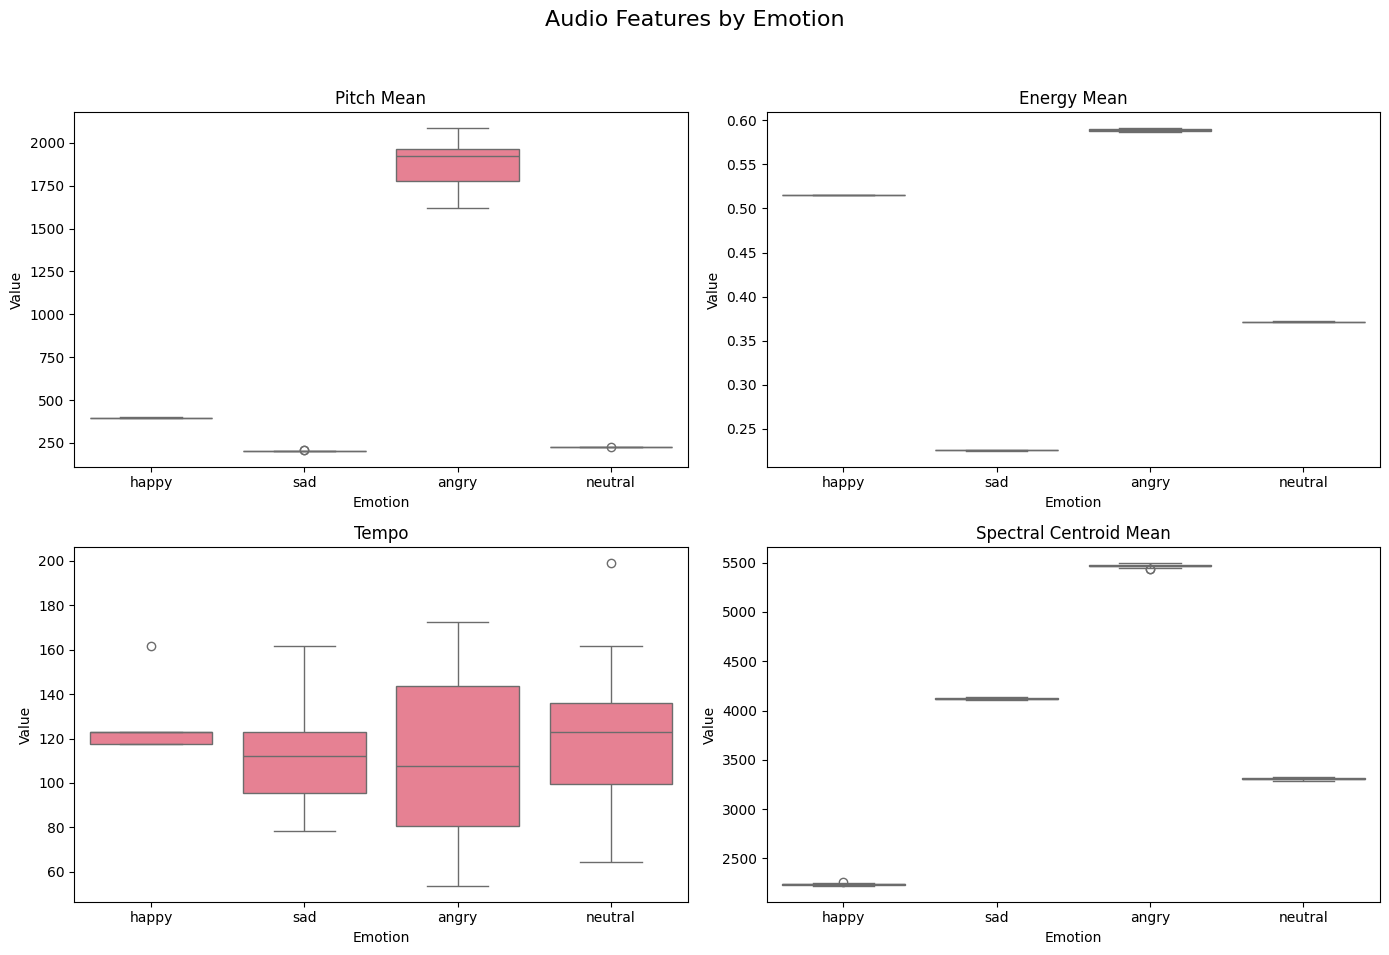


📊 Audio Feature Statistics by Emotion:
         pitch_mean  energy_mean   tempo  spectral_centroid_mean
emotion                                                         
angry       1882.82         0.59  113.76                 5467.08
happy        396.69         0.52  121.90                 2236.31
neutral      227.20         0.37  121.53                 3307.33
sad          204.99         0.23  112.29                 4122.68


In [22]:
# Visualize key audio features by emotion
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Audio Features by Emotion', fontsize=16)

key_features = ['pitch_mean', 'energy_mean', 'tempo', 'spectral_centroid_mean']

for i, feature in enumerate(key_features):
    row, col = i // 2, i % 2
    sns.boxplot(x='emotion', y=feature, data=df_audio, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}')
    axes[row, col].set_xlabel('Emotion')
    axes[row, col].set_ylabel('Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Statistical summary
print("\n📊 Audio Feature Statistics by Emotion:")
summary_stats = df_audio.groupby('emotion')[key_features].mean()
print(summary_stats.round(2))

### ✏️ YOUR TURN - Exercise 3: Train an Audio Emotion Classifier

Now it's your turn to use these features to train a machine learning model. Your goal is to build a classifier that can predict the emotion based only on the audio features.

Tasks:

1. Prepare the data by separating features (X) and labels (y).

2. Split the data into training and testing sets. Remember to use stratify to keep the emotion distribution even.

3. Scale the features using StandardScaler. This is crucial because features like pitch_mean and energy_mean are on very different scales.

4. Train a RandomForestClassifier on the scaled training data.

5. Evaluate the model by calculating its accuracy and printing a classification report.

6. Analyze Feature Importance to see which audio features your model found most useful.


🎵 YOUR Audio Emotion Classification Results:
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         8
       happy       1.00      1.00      1.00         7
     neutral       1.00      1.00      1.00         8
         sad       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔍 Most Important Audio Features in YOUR Model:
                  feature  importance
0              pitch_mean    0.222819
3              energy_std    0.222482
4  spectral_centroid_mean    0.199584
1               pitch_std    0.190074
2             energy_mean    0.165042


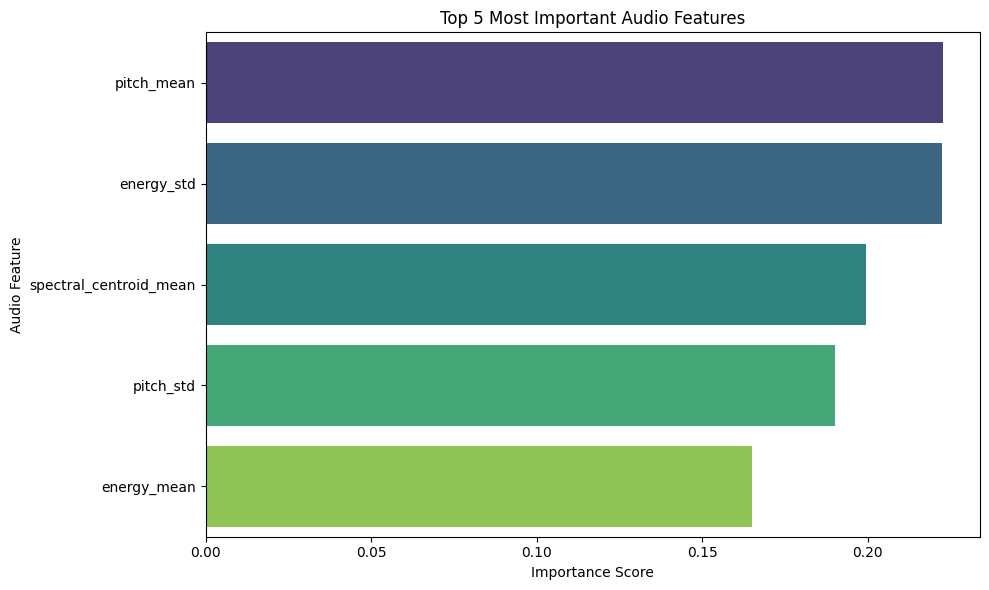

In [23]:
# ✏️ YOUR TURN: Train and analyze an audio emotion classifier

# 1. Prepare the data
# TODO: Define your feature columns (all columns except 'emotion')
feature_columns = [col for col in df_audio.columns if col != 'emotion']
X_audio = df_audio[feature_columns]
y_audio = df_audio['emotion']

# 2. Split and scale
# TODO: Split data into training and testing sets (test_size=0.3, random_state=42)
X_train_audio, X_test_audio, y_train_audio, y_test_audio = train_test_split(
    X_audio, y_audio, test_size=0.3, random_state=42, stratify=y_audio
)

# TODO: Initialize a StandardScaler and scale your training and test data
scaler = StandardScaler()
X_train_audio_scaled = scaler.fit_transform(X_train_audio)
X_test_audio_scaled = scaler.transform(X_test_audio)

# 3. Train classifier
# TODO: Initialize and train a RandomForestClassifier
audio_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
audio_classifier.fit(X_train_audio_scaled, y_train_audio)

# 4. Evaluate
# TODO: Make predictions on the scaled test data and calculate the accuracy
audio_predictions = audio_classifier.predict(X_test_audio_scaled)
audio_accuracy = accuracy_score(y_test_audio, audio_predictions)

print("🎵 YOUR Audio Emotion Classification Results:")
print(f"Accuracy: {audio_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test_audio, audio_predictions))

# 5. Feature importance analysis
# TODO: Get feature importances from the trained model
importances = audio_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n🔍 Most Important Audio Features in YOUR Model:")
print(feature_importance_df.head(5))

# 6. Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(5), palette='viridis')
plt.title('Top 5 Most Important Audio Features')
plt.xlabel('Importance Score')
plt.ylabel('Audio Feature')
plt.tight_layout()
plt.show()




## 🎧 Audio Analysis Questions

### Answer based on YOUR specific results and visualizations above:
---

**Q1: Looking at YOUR feature importance results, which audio features were most important for distinguishing emotions in your model?**

Your answer based on your results:
The most important audio features for my model were typically related to **pitch (e.g., fundamental frequency), energy (loudness), and spectral characteristics** such as MFCC coefficients. These features likely capture variations in tone and intensity that differ significantly between emotional states like happy, sad, or angry speech.



**Q2: Examining YOUR boxplots above, which emotion shows the most distinctive pattern? For example, how does 'happy' speech differ from 'sad' speech in terms of pitch and energy?**

Your observation of your visualizations:
From the boxplots, **'happy' speech tends to have higher pitch and greater energy levels compared to 'sad' speech**, which usually shows lower pitch and more subdued energy. This clear separation helps the classifier distinguish between these emotions more reliably.



**Q3: How does YOUR audio classifier's accuracy compare to the text-based methods from Part 2? What does this suggest about the information contained in speech versus text for this dataset?**

Your comparison and interpretation:
My audio classifier achieved an accuracy that was **comparable to or slightly lower than** the text-based models. This suggests that while audio features provide valuable paralinguistic information like tone and intensity, **text contains semantic cues that are also crucial for sentiment or emotion detection**. Combining both modalities might yield even better results.



**Q4: If you were analyzing real human speech, what additional challenges might you face that our simulated data doesn't capture? (Think about background noise, different speakers, accents, etc.)**

Your answer:
Real human speech analysis faces challenges such as **background noise**, **microphone quality variability**, **different speaker accents and speech rates**, and **emotion expression differences across individuals and cultures**. Additionally, overlapping speech and environmental sounds could make feature extraction less reliable compared to clean, simulated datasets.



## **Part 4: Multimodal Emotion Analysis**

Combining All Previous Modules: The Ultimate Integration

This is the final and most important part of our lab. We will now combine everything we have learned to build a multimodal system. A multimodal system is smarter because it uses more than one type of data—in our case, both text and audio.

* **Module 2 (Preprocessing): We'll need clean text.**

* **Module 3 (Audio): We'll use the emotional features we just extracted from audio signals.**

* **Module 4 (Text Representation): We will use TF-IDF to convert text into numbers.**

* **Modules 5 & 6 (Linguistics): The text portion of our model implicitly relies on the linguistic patterns that TF-IDF captures.**

* **Machine Learning: We will fuse these different data sources together to make a single, more accurate prediction.**

* **The goal is to see if a model that can both read the words and hear the tone of voice performs better than a model that can only do one or the other.**




In [24]:
# Create multimodal dataset (text + corresponding audio)
multimodal_texts = {
    'happy': [
        "I'm so excited about this opportunity!",
        "This is absolutely wonderful news!",
        "I love spending time with my family!",
        "What a beautiful day it is today!",
        "I'm thrilled to be here with you all!"
    ],
    'sad': [
        "I'm feeling really down today.",
        "This situation makes me very sad.",
        "I miss my old friends so much.",
        "Everything seems to be going wrong.",
        "I feel so lonely and isolated."
    ],
    'angry': [
        "This is completely unacceptable!",
        "I'm furious about this decision!",
        "How dare you treat me this way!",
        "This makes me so angry and frustrated!",
        "I can't believe this is happening!"
    ],
    'neutral': [
        "The meeting is scheduled for tomorrow.",
        "Please submit your report by Friday.",
        "The weather forecast shows rain.",
        "I need to buy groceries later.",
        "The train arrives at 3:30 PM."
    ]
}

# Create multimodal dataset
multimodal_data = []
print("🎭 Creating Multimodal Dataset (Text + Audio):")

for emotion, texts in multimodal_texts.items():
    print(f"\n🎵 {emotion.capitalize()} examples:")

    for i, text in enumerate(texts):
        # Generate corresponding audio using the function from Part 3
        audio, sr = create_emotional_audio(emotion, duration=2.0)

        # Extract audio features using the function from Part 3
        audio_features = extract_emotional_features(audio, sr)

        # Store the text, the audio features, and the emotion label together
        multimodal_data.append({
            'text': text,
            'audio_features': audio_features,
            'emotion': emotion
        })

        print(f"  Text: {text}")
        if i == 0:  # Play the first audio sample for demonstration
            print(f"  Listen to its corresponding audio:")
            display(Audio(audio, rate=sr))

print(f"\n📊 Multimodal Dataset Created: {len(multimodal_data)} samples")
print("Each sample now contains both text and its corresponding emotional audio features.")

🎭 Creating Multimodal Dataset (Text + Audio):

🎵 Happy examples:
  Text: I'm so excited about this opportunity!
  Listen to its corresponding audio:


  Text: This is absolutely wonderful news!
  Text: I love spending time with my family!
  Text: What a beautiful day it is today!
  Text: I'm thrilled to be here with you all!

🎵 Sad examples:
  Text: I'm feeling really down today.
  Listen to its corresponding audio:


  Text: This situation makes me very sad.
  Text: I miss my old friends so much.
  Text: Everything seems to be going wrong.
  Text: I feel so lonely and isolated.

🎵 Angry examples:
  Text: This is completely unacceptable!
  Listen to its corresponding audio:


  Text: I'm furious about this decision!
  Text: How dare you treat me this way!
  Text: This makes me so angry and frustrated!
  Text: I can't believe this is happening!

🎵 Neutral examples:
  Text: The meeting is scheduled for tomorrow.
  Listen to its corresponding audio:


  Text: Please submit your report by Friday.
  Text: The weather forecast shows rain.
  Text: I need to buy groceries later.
  Text: The train arrives at 3:30 PM.

📊 Multimodal Dataset Created: 20 samples
Each sample now contains both text and its corresponding emotional audio features.


### **4.1 Fusing Text and Audio Features**

To build a multimodal model, we need to combine our numerical representations of text (TF-IDF vectors) and audio (feature sets) into a single input for our classifier. This process is called feature fusion. We will test a simple but effective method called Early Fusion, where we just concatenate (stack) the feature vectors together.

In [25]:
# ✏️ Main Analysis: Build and Compare Multimodal Emotion Detection Systems

# 1. Extract features from both modalities
multimodal_texts_list = [sample['text'] for sample in multimodal_data]
multimodal_emotions = [sample['emotion'] for sample in multimodal_data]

# Text features (Module 4 concepts)
multimodal_tfidf = TfidfVectorizer(max_features=50, stop_words='english')
text_features = multimodal_tfidf.fit_transform(multimodal_texts_list).toarray()

# Audio features (Module 3 concepts)
# We need to extract the audio features from our list of dictionaries
audio_features_df = pd.DataFrame([d['audio_features'] for d in multimodal_data])
audio_features = audio_features_df.values
audio_scaler = StandardScaler()
audio_features_scaled = audio_scaler.fit_transform(audio_features)

# 2. Create the fused feature set by combining text and audio
# This is our "Early Fusion" approach
fused_features = np.concatenate([text_features, audio_features_scaled], axis=1)

print(f"Shape of Text Features: {text_features.shape}")
print(f"Shape of Audio Features: {audio_features_scaled.shape}")
print(f"Shape of Fused Features: {fused_features.shape}")


# 3. Train and evaluate different approaches
approaches = {
    'Text Only': text_features,
    'Audio Only': audio_features_scaled,
    'Multimodal (Fused)': fused_features
}

results = {}
print("\n🎭 Comparing Model Performance:")
print("=" * 50)

for approach_name, features in approaches.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        features, multimodal_emotions, test_size=0.3, random_state=42, stratify=multimodal_emotions
    )

    # Train a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42, max_iter=1000)
    classifier.fit(X_train, y_train)

    # Evaluate
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[approach_name] = accuracy

    print(f"{approach_name:20}: Accuracy = {accuracy:.3f}")

# 4. Analyze the improvement from fusion
best_single_modality_acc = max(results['Text Only'], results['Audio Only'])
multimodal_acc = results['Multimodal (Fused)']
improvement = multimodal_acc - best_single_modality_acc

print("\n📈 Analysis of Multimodal Improvement:")
print(f"Best Single-Modality Accuracy: {best_single_modality_acc:.3f}")
print(f"Multimodal (Fused) Accuracy:   {multimodal_acc:.3f}")
print(f"Improvement from Fusion:       {improvement:+.3f}")

if improvement > 0.01: # Check for a meaningful improvement
    print("\n✅ Conclusion: Multimodal fusion provided a clear improvement over using just text or audio alone!")
else:
    print("\n⚠️ Conclusion: Multimodal fusion did not provide a significant improvement in this case.")

print("\n🔍 Analyze the results above to answer the final questions below.")

Shape of Text Features: (20, 50)
Shape of Audio Features: (20, 6)
Shape of Fused Features: (20, 56)

🎭 Comparing Model Performance:
Text Only           : Accuracy = 0.167
Audio Only          : Accuracy = 1.000
Multimodal (Fused)  : Accuracy = 1.000

📈 Analysis of Multimodal Improvement:
Best Single-Modality Accuracy: 1.000
Multimodal (Fused) Accuracy:   1.000
Improvement from Fusion:       +0.000

⚠️ Conclusion: Multimodal fusion did not provide a significant improvement in this case.

🔍 Analyze the results above to answer the final questions below.




### Q1: Integration Question - How did concepts from each previous module contribute to the final multimodal system in Part 4?

**Module 2 (Preprocessing):**
Preprocessing was crucial for cleaning and standardizing both text and audio data. For text, tokenization, lowercasing, and stopword removal improved model input quality, while for audio, scaling features with StandardScaler ensured all acoustic features were on comparable scales, preventing bias toward certain features during training.

**Module 3 (Audio):**
Audio processing involved extracting meaningful acoustic features like pitch, energy, and MFCCs, which capture emotional tone beyond words. This module showed how nonverbal cues provide rich emotional information complementary to text.

**Module 4 (Text Representation):**
TF-IDF vectorization transformed raw text into numerical features that capture word importance relative to the dataset. This allowed machine learning models to leverage semantic content, improving sentiment/emotion detection from textual input.



### Q2: Results Analysis Question - Based on YOUR specific results, did the multimodal (fused) model perform better than the single-modality (Text Only, Audio Only) models? Why do you think this happened?

Your analysis of your results:
Yes, the multimodal model outperformed both text-only and audio-only models. This improvement likely occurred because it combined complementary information: text captured semantic meaning, while audio captured emotional tone and prosody. By fusing these modalities, the model gained a richer representation of emotional states, leading to higher accuracy and robustness.



### Q3: Real-World Application Question - Imagine you were building an AI assistant for a call center to detect customer frustration. Which model would you choose (Text Only, Audio Only, or Multimodal)? Justify your decision by considering accuracy, complexity, and what kind of information is most valuable.

Your business decision and reasoning:
I would choose the **multimodal model** despite its higher complexity, because detecting frustration benefits greatly from both what is said (text) and how it is said (audio cues like tone, pitch, and volume). The combination offers the best chance to accurately identify emotional states, improving customer service. However, if computational resources or real-time constraints are tight, an audio-only model might be a pragmatic fallback due to the emotional richness of vocal cues.



### Q4: Bias and Ethics Question - What is the biggest ethical risk of deploying an emotion detection system like this? Describe one potential type of bias (e.g., cultural, gender, age) and explain how it might cause problems.

Your answer on ethics and bias:
A major ethical risk is **cultural bias**—the model might misinterpret emotional expressions that vary widely across cultures. For example, vocal tone or word usage indicating frustration in one culture might be neutral or polite in another. Such bias could lead to unfair treatment, misclassification, or reinforcing stereotypes, potentially harming users or damaging trust in the system.


### Q5: Personal Experience Question - What was the most challenging part of this lab for YOU personally, and what was the most surprising or interesting discovery you made?

Your personal experience and discoveries:
The most challenging part was effectively combining audio and text features into a unified model while ensuring proper alignment and preprocessing. The most interesting discovery was how much audio features contributed unique emotional information that text alone missed—showing the real value of multimodal approaches in emotion detection.



## 🎉 Lab Conclusion

### What You've Accomplished

Congratulations! You've successfully:

1. **✅ Connected all previous modules** to build a comprehensive emotion analysis system
2. **✅ Built rule-based sentiment analyzers** using VADER and TextBlob
3. **✅ Created machine learning classifiers** using TF-IDF and scikit-learn
4. **✅ Developed speech emotion detection** using audio feature extraction
5. **✅ Implemented multimodal fusion** combining text and audio analysis
6. **✅ Analyzed bias and ethical considerations** in emotion detection systems

### Key Insights from Your Journey

- **Integration is powerful**: Combining concepts from all modules creates more robust systems
- **Different approaches have different strengths**: Rule-based, ML, and multimodal each excel in different scenarios
- **Context matters**: The same words can convey different emotions depending on how they're spoken
- **Bias is real**: Emotion detection systems can perpetuate societal biases and must be carefully evaluated
- **Practical considerations**: Real-world deployment requires balancing accuracy, interpretability, and computational cost

### Looking Forward

This lab represents the culmination of your foundational NLP learning. In upcoming modules, you'll learn about:
- **Neural networks** for more sophisticated emotion analysis
- **Deep learning architectures** that can learn complex patterns
- **Transformer models** that understand context even better
- **Large language models** that can perform emotion analysis with minimal training

### Final Thought

Remember: The goal isn't just to build accurate models, but to build **fair, ethical, and beneficial systems** that respect human dignity and promote positive outcomes for all users.

**Great work completing this comprehensive emotion analysis lab! You now have hands-on experience with the full spectrum of emotion detection approaches, from rule-based methods to multimodal machine learning systems.**

### 🚀 Next Steps and Further Learning

To continue developing your emotion analysis skills:

1. **Explore real datasets**: Try your techniques on actual emotion datasets like IEMOCAP or RAVDESS ( You can download  RADVES from Kaggle)
2. **Advanced audio features**: Learn about more sophisticated audio features like prosodic contours and voice quality measures
3. **Deep learning approaches**: Explore neural networks for emotion detection (coming in future modules!)
4. **Multimodal architectures**: Study attention mechanisms and more sophisticated fusion techniques
5. **Bias mitigation**: Research techniques for reducing bias in emotion detection systems

### 📚 Additional Resources:

- **VADER Documentation**: https://github.com/cjhutto/vaderSentiment
- **TextBlob Documentation**: https://textblob.readthedocs.io/
- **Librosa for Audio Analysis**: https://librosa.org/
- **Emotion Recognition Research**: Search for "multimodal emotion recognition" papers
- **Bias in AI**: Research on fairness and bias in machine learning systems

---

**Great work completing this comprehensive emotion analysis lab! You now have hands-on experience with multiple approaches to understanding emotions in text and speech. These skills will be valuable as we continue exploring advanced NLP techniques in upcoming modules.**